# **`Biblioteke i uneseni set podataka`**


Tim 13 je zadaću radio zajedno i zadaci su bili ravnomjerno raspoređeni na sve članove grupe.

In [ ]:
!git clone https://github.com/adidrakovac1/VIS23/

Cloning into 'VIS23'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), 14.96 KiB | 1.50 MiB/s, done.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statistics
import plotly.express as px
from mpl_toolkits import mplot3d
from prettytable import PrettyTable
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

exam = pd.read_csv('/content/VIS23/studentsperformaceprediction.csv')


Mounted at /content/drive


# **`NOTE`**`: Kompajlirati za spašavanje nove baze !`

In [1]:
path = '/content/VIS23-Z2-TIM16/studentsperformaceprediction.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f: exam.to_csv(f)

FileNotFoundError: ignored

# **`Provjera greški u varijablama`**

In [ ]:
exam.isnull().any()

student_id                     False
gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
final_grade_math               False
final_grade_reading            False
final_grade_writing            False
dtype: bool

# **`Deklarisanje varijabli`**

In [ ]:
gender = exam['gender']
race = exam['race/ethnicity']
education = exam['parental level of education']
lunch = exam['lunch']
test = exam['test preparation course']
math = exam['math score']
reading = exam['reading score']
writing = exam['writing score']
all_score=math+reading+writing



exam.loc[(math>=0)&(math<55),'final_grade_math']=5
exam.loc[(math>=55)&(math<65),'final_grade_math']=6
exam.loc[(math>=65)&(math<75),'final_grade_math']=7
exam.loc[(math>=75)&(math<85),'final_grade_math']=8
exam.loc[(math>=85)&(math<95),'final_grade_math']=9
exam.loc[(math>=95)&(math<=100),'final_grade_math']=10

exam.loc[(reading>=0)&(reading<55),'final_grade_reading']=5
exam.loc[(reading>=55)&(reading<65),'final_grade_reading']=6
exam.loc[(reading>=65)&(reading<75),'final_grade_reading']=7
exam.loc[(reading>=75)&(reading<85),'final_grade_reading']=8
exam.loc[(reading>=85)&(reading<95),'final_grade_reading']=9
exam.loc[(reading>=95)&(reading<=100),'final_grade_reading']=10

exam.loc[(writing>=0)&(writing<55),'final_grade_writing']=5
exam.loc[(writing>=55)&(writing<65),'final_grade_writing']=6
exam.loc[(writing>=65)&(writing<75),'final_grade_writing']=7
exam.loc[(writing>=75)&(writing<85),'final_grade_writing']=8
exam.loc[(writing>=85)&(writing<95),'final_grade_writing']=9
exam.loc[(writing>=95)&(writing<=100),'final_grade_writing']=10

f_math=exam['final_grade_math']
f_reading=exam['final_grade_reading']
f_writing=exam['final_grade_writing']

 
exam.head(1000)

,student_id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,final_grade_math,final_grade_reading,final_grade_writing
0,0,female,group D,some college,standard,completed,59,70,78,6,7,8
1,1,male,group D,associate's degree,standard,none,96,93,87,10,9,9
2,2,female,group D,some college,free/reduced,none,57,76,77,6,8,8
3,3,male,group B,some college,free/reduced,none,70,70,63,7,7,6
4,4,female,group D,associate's degree,standard,none,83,85,86,8,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,male,group C,some college,standard,none,77,77,71,8,8,7
996,996,male,group C,some college,standard,none,80,66,66,8,7,7
997,997,female,group A,high school,standard,completed,67,86,86,7,9,9
998,998,male,group E,high school,standard,none,80,72,62,8,7,6


# **`Kratki sažetak vrijednosti iz ispita`**

In [ ]:
exam.describe(include="all")

,student_id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,final_grade_math,final_grade_reading,final_grade_writing
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,2,5,6,2,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,male,group C,some college,standard,none,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,508,323,224,660,656,NaN,NaN,NaN,NaN,NaN,NaN
mean,499.500000,NaN,NaN,NaN,NaN,NaN,67.810000,70.382000,69.140000,6.920000,7.157000,7.029000
std,288.819436,NaN,NaN,NaN,NaN,NaN,15.250196,14.107413,15.025917,1.356259,1.349879,1.400757
min,0.000000,NaN,NaN,NaN,NaN,NaN,15.000000,25.000000,15.000000,5.000000,5.000000,5.000000
25%,249.750000,NaN,NaN,NaN,NaN,NaN,58.000000,61.000000,59.000000,6.000000,6.000000,6.000000
50%,499.500000,NaN,NaN,NaN,NaN,NaN,68.000000,70.500000,70.000000,7.000000,7.000000,7.000000
75%,749.250000,NaN,NaN,NaN,NaN,NaN,79.250000,80.000000,80.000000,8.000000,8.000000,8.000000


# **`Informacije o varijablama u setu podataka`**

In [ ]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   student_id                   1000 non-null   int64 
 1   gender                       1000 non-null   object
 2   race/ethnicity               1000 non-null   object
 3   parental level of education  1000 non-null   object
 4   lunch                        1000 non-null   object
 5   test preparation course      1000 non-null   object
 6   math score                   1000 non-null   int64 
 7   reading score                1000 non-null   int64 
 8   writing score                1000 non-null   int64 
 9   final_grade_math             1000 non-null   int64 
 10  final_grade_reading          1000 non-null   int64 
 11  final_grade_writing          1000 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 101.6+ KB


# **Pitanje:** Koji je domen interesovanja studenata na osnovu rezultata po ispitu?
- Prikaz pomoću histograma.

In [ ]:
fig=px.histogram(exam,x='math score', marginal = 'box')
fig.show()

print("\n")

fig=px.histogram(exam,x='writing score', marginal = 'box')
fig.show()

print("\n")

fig=px.histogram(exam,x='reading score', marginal = 'box')
fig.show()

print("\n")
 
fig=px.histogram(exam,x=all_score, marginal = 'box')
fig.show()

print("\n")


Na osnovu prikazanih histograma možemo zaključiti da domen najvećeg interesovanja ne možemo tačno odrediti jer se ne primijete veće razlike na osnovu kojih bi se moglo reći da za neki od predmeta studenti nisu zainteresovani.

# **Pitanje:** Da li se različite etničke grupe i spolovi drugačije odnose prema predmetima u vidu pristupa učenju i ozbiljnosti u izvršavanju obaveza?
*prikaz pomoću box plotova

In [ ]:


fig=px.box(exam,x='gender',y='writing score',color='race/ethnicity',title='Komparacija etnickih grupa po spolu i njihovih rezultata iz pisanja')
fig.show()
print('\n')
fig=px.box(exam,x='gender',y='math score',color='race/ethnicity',title='Komparacija etnickih grupa po spolu i njihovih rezultata iz matematike')
fig.show()
print('\n')
fig=px.box(exam,x='gender',y='reading score',color='race/ethnicity',title='Komparacija etnickih grupa po spolu i njihovih rezultata iz čitanja')
fig.show()

Na osnovu prikazanih box plotova vidimo da je grupa E najozbiljnije pristupila izvršavanju obaveza što se može vidjeti u sva tri predmeta, naročito ženski dio populacije.

# **Pitanje:** Kako bi izgledao prikaz svih rezultata u 3d dijagramu?
- Prikaz pomoću 3D scattera.

In [ ]:
#Scatter plot: 
fig = px.scatter_3d(exam, x='math score', y='writing score', z='reading score')
fig.show()

# **Prikaz podataka ukoliko uzmemo u obzir 30% nasumičnih podataka:**

In [ ]:
fig = px.scatter_3d(exam.sample(frac=0.30), x='math score', y='writing score', z='reading score')
fig.show()

# **Pitanje:** Koliko iznosi srednja vrijednost, moda, medijana ukupnog uspjeha?


In [ ]:
#Analiza rezultata iz matematike:
math_mean=statistics.mean(math)
math_moda=statistics.mode(math)
math_mediana=statistics.median(math)
math_varijansa=statistics.variance(math)

#Analiza rezultata iz čitanja
reading_mean=statistics.mean(reading)
reading_moda=statistics.mode(reading)
reading_mediana=statistics.median(reading)
reading_varijansa=statistics.variance(reading)

#Analiza rezultata iz pisanja:
writing_mean=statistics.mean(writing)
writing_moda=statistics.mode(writing)
writing_mediana=statistics.median(writing)
writing_varijansa=statistics.variance(writing)

tabela = PrettyTable(["Test", "Prosjek bodova", "Medijana bodova", "Moda bodova", "Varijansa"])
tabela.add_row(["Matematika", math_mean, math_mediana, math_moda, round(math_varijansa,2)])
tabela.add_row(["Čitanje", reading_mean, reading_mediana, reading_moda, round(reading_varijansa,2)])
tabela.add_row(["Pisanje", writing_mean, writing_mediana, writing_moda, round(writing_varijansa,2)])
print(tabela)

+------------+----------------+-----------------+-------------+-----------+
|    Test    | Prosjek bodova | Medijana bodova | Moda bodova | Varijansa |
+------------+----------------+-----------------+-------------+-----------+
| Matematika |     67.81      |       68.0      |      62     |   232.57  |
|  Čitanje   |     70.382     |       70.5      |      72     |   199.02  |
|  Pisanje   |     69.14      |       70.0      |      78     |   225.78  |
+------------+----------------+-----------------+-------------+-----------+


Baš kao što smo zaključili u prvom prikazu, prosjek bodova, medijana bodova, moda bodova, kao i varijanska pokazuju da su rezultati prilično ujednačeni.

# **Pitanje:** Kako izgledaju rezultati studenata na osnovu nivoa obrazovanja roditelja i na osnovu nacije?

<Figure size 5000x5000 with 0 Axes>

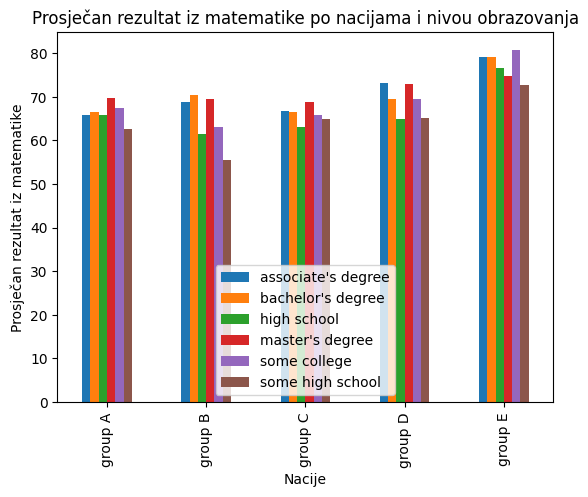

<Figure size 5000x5000 with 0 Axes>

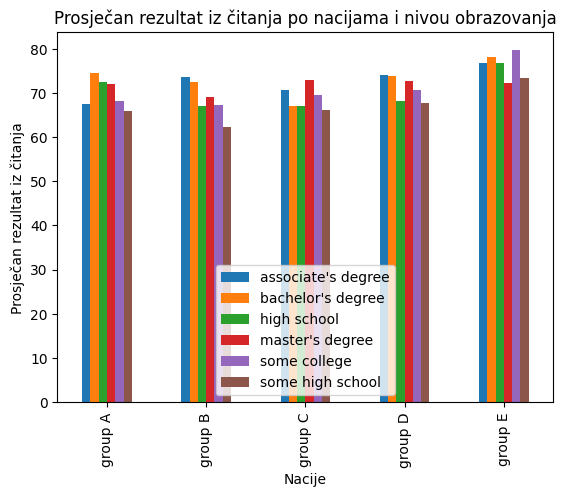

<Figure size 5000x5000 with 0 Axes>

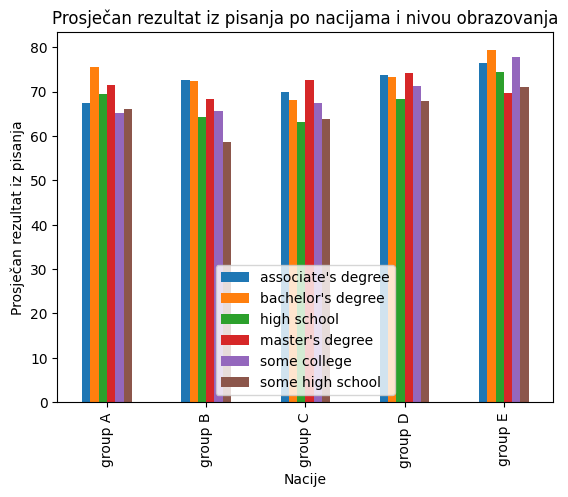

In [ ]:
grouped_data = exam.groupby(['race/ethnicity', 'parental level of education'])['math score'].mean()
plt.figure(figsize=(50,50)) 
grouped_data.unstack().plot(kind='bar')
plt.xlabel('Nacije')
plt.ylabel('Prosječan rezultat iz matematike')
plt.title('Prosječan rezultat iz matematike po nacijama i nivou obrazovanja roditelja')
plt.legend(loc='best')
plt.show()
print('\n')

grouped_data = exam.groupby(['race/ethnicity', 'parental level of education'])['reading score'].mean()
plt.figure(figsize=(50,50)) 
grouped_data.unstack().plot(kind='bar')
plt.xlabel('Nacije')
plt.ylabel('Prosječan rezultat iz čitanja')
plt.title('Prosječan rezultat iz čitanja po nacijama i nivou obrazovanja roditelja')
plt.legend(loc='best')
plt.show()
print('\n')

grouped_data = exam.groupby(['race/ethnicity', 'parental level of education'])['writing score'].mean()
plt.figure(figsize=(50,50)) 
grouped_data.unstack().plot(kind='bar')
plt.xlabel('Nacije')
plt.ylabel('Prosječan rezultat iz pisanja')
plt.title('Prosječan rezultat iz pisanja po nacijama i nivou obrazovanja roditelja')
plt.legend(loc='best')
plt.show()
print('\n')

Primjećujemo da u rezultatima iz čitanja i matematike grupa E ima ponajbolje rezultate, dok ih u rezultatima iz pisanja stižu i ostale grupe. Unutar ovih grupa je gledajući na sve prikaze prilično ujednačen rezultat u odnosu na nivo obrazovanja.

# **Pitanje:** Kako izgledaju rezultati studenata na osnovu isključivo spola ?
- Prikaz pomoću scatter plotova.

In [ ]:
fig = px.scatter(exam, x='math score', y='reading score', color='gender',title='Rezultati matematike i citanja na osnovu spola')
fig.show()
print('\n')
fig = px.scatter(exam, x='math score', y='writing score', color='gender',title='Rezultati matematike i pisanja na osnovu spola')
fig.show()
print('\n')
fig = px.scatter(exam, x='writing score', y='reading score', color='gender',title='Rezultati pisanja i citanja na osnovu spola')
fig.show()

In [ ]:
fig = px.scatter(exam, x='student_id', y='math score', color='gender',title='Rezultati matematike prikazani uz pomoc studentskog id-a')
fig.show()

Možemo primijetiti da se ženski dio populacije bolje snalazi u izvršavanju različitih obaveza, međutim našli smo i primjer gdje su ženski i muški dio populacije prilično ujednačeni, što se vidi iz zadnjeg scatter plota.

# **Pitanje:** Kako izgledaju box-plotovi rezultata ispita studenata na osnovu završenog pripremnog kursa i etničke grupe ?
- Prikaz pomoću box-plotova.

In [ ]:
fig=px.box(exam,x='race/ethnicity',y='writing score',color='test preparation course',title='Komparacija etnicki grupa sa osobama koje su zavrsile "test preparation course" i njihovih rezultata iz pisanja')
fig.show()
print('\n')
fig=px.box(exam,x='race/ethnicity',y='reading score',color='test preparation course',title='Komparacija etnicki grupa sa osobama koje su zavrsile "test preparation course" i njihovih rezultata iz citanja')
fig.show()
print('\n')
fig=px.box(exam,x='race/ethnicity',y='math score',color='test preparation course',title='Komparacija etnicki grupa sa osobama koje su zavrsile "test preparation course" i njihovih rezultata iz matematike')
fig.show()

Iz ovih bar plotova kao i u prethodnom dijelu izlaganja možemo zaključiti da blagu prednost ima grupa E, pri čemu važnu ulogu ima pripremni kurs koji su pohađali članovi te grupe.

# **Pitanje:** Kakva je distribucija bodova u odnosu na stepen obrazovanja ?
- Prikaz pomoću histograma.

In [ ]:
fig = px.histogram(exam, x='math score', nbins=30, color='parental level of education',title='Distribucija bodova iz matematike')
fig.show()
print('\n')
fig = px.histogram(exam, x='reading score', nbins=30, color='parental level of education',title='Distribucija bodova iz citanja')
fig.show()
print('\n')
fig = px.histogram(exam, x='writing score', nbins=30, color='parental level of education',title='Distribucija bodova iz pisanja')
fig.show()

# **Pitanje:** Kakav je rezultat bodova studenata na osnovu nivoa obrazovanja i završenog pripremnog kursa ?
- Prikaz pomoću box-plotova.

In [ ]:
fig = px.violin(exam, x='test preparation course', y='reading score', color='parental level of education', box=True, points='all',title='Prikaz bodova iz citanja na osnovu nivoa obrazovanja i test preparation kursa')
fig.show()
print('\n')
fig = px.violin(exam, x='test preparation course', y='writing score', color='parental level of education', box=True, points='all',title='Prikaz bodova iz pisanja na osnovu nivoa obrazovanja i test preparation kursa')
fig.show()
print('\n')
fig = px.violin(exam, x='test preparation course', y='math score', color='parental level of education', box=True, points='all',title='Prikaz bodova iz matematike na osnovu nivoa obrazovanja i test preparation kursa')
fig.show()

# **Pitanje:** Prikaz kolone bodova i kolone konačne ocjene iz ispita te prikaz prosječne dobijene ocjene ! 

In [ ]:
exam.head(1000)
print(exam[['math score','final_grade_math']])
print(exam[['reading score','final_grade_reading']])
print(exam[['writing score','final_grade_writing']])

math_mean=statistics.mean(f_math)
reading_mean=statistics.mean(f_reading)
writing_mean=statistics.mean(f_writing)

print('Prosjecne ocjene iz matematike, čitanja i pisanja: ')

tabela = PrettyTable(["Test", "Prosjecna ocjena","Zaokruzeno na najblizu decimalu"])
tabela.add_row(["Matematika", math_mean,round(math_mean)])
tabela.add_row(["Čitanje", reading_mean,round(reading_mean)])
tabela.add_row(["Pisanje", writing_mean,round(writing_mean)])
print(tabela)

     math score final_grade_math
0            59                6
1            96               10
2            57                6
3            70                7
4            83                8
..          ...              ...
995          77                8
996          80                8
997          67                7
998          80                8
999          58                6

[1000 rows x 2 columns]
     reading score final_grade_reading
0               70                   7
1               93                   9
2               76                   8
3               70                   7
4               85                   9
..             ...                 ...
995             77                   8
996             66                   7
997             86                   9
998             72                   7
999             47                   5

[1000 rows x 2 columns]
     writing score final_grade_writing
0               78                   8
1       

#**Pitanje:** Kako izgleda konačni uspjeh studenata iz datih ispita na osnovu nivoa obrazovanja?

In [ ]:
fig = px.histogram(exam, x='final_grade_math', nbins=30, color='parental level of education',title='Distribucija konačnih ocjena iz matematike')
fig.show()
print('\n')
fig = px.histogram(exam, x='final_grade_reading', nbins=30, color='parental level of education',title='Distribucija konačnih ocjena iz citanja')
fig.show()
print('\n')
fig = px.histogram(exam, x='final_grade_writing', nbins=30, color='parental level of education',title='Distribucija konačnih iz pisanja')
fig.show()

# **Pitanje:** Da li postoji razlika između muških i ženski studenata što se tiče konačnog uspjeha iz matematike?

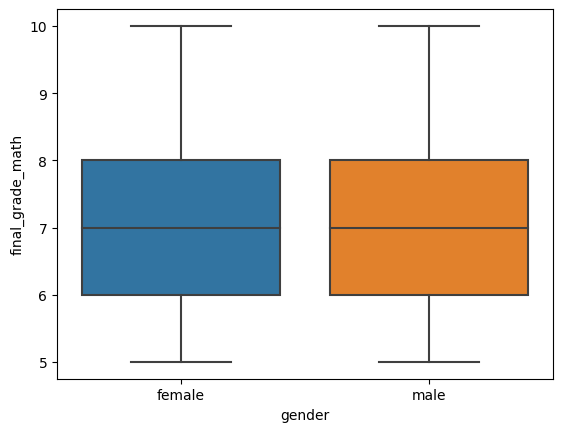

In [ ]:
sns.boxplot(x='gender', y='final_grade_math', data=exam)
print('\n')
fig = px.histogram(exam, x='final_grade_math', nbins=30, color='gender',title='Brojčana vrijednost ocjena iz matematike')
fig.show()
print('\n')

Na osnovu box plota ne možemo donijeti zaključak koji dio populacije je dominantan iz matematike, ali možemo s histograma.

# **Pitanje:** Da li postoji razlika između muški i ženski studenata što se tiče konačnog uspjeha iz čitanja?

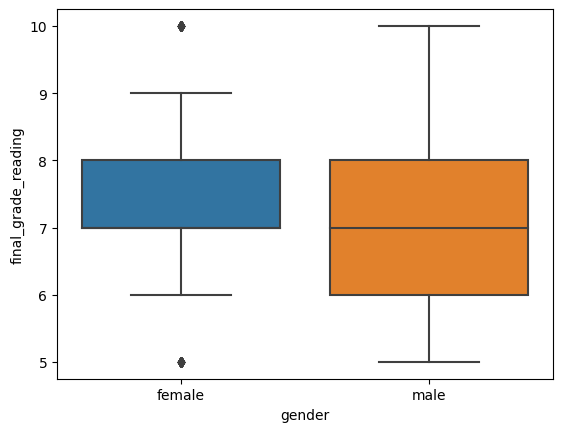

In [ ]:
sns.boxplot(x='gender', y='final_grade_reading', data=exam)
print('\n')
fig = px.histogram(exam, x='final_grade_reading', nbins=30, color='gender',title='Brojčana vrijednost ocjena iz čitanja')
fig.show()
print('\n')

Na osnovu ovog box plota možemo primijetiti da ženski dio populacije ima prilično uravnoteženu distribuciju ocjena koja je između 7 i 8 u čitanju, dok su muškarci skloni dobijanju ocjena između 6 i 8, što smo vidjeli i iz prosječne ocjene 7.

# **Pitanje:** Da li postoji razlika između muških i ženskih studenata što se tiče konačnog uspjeha iz pisanja?

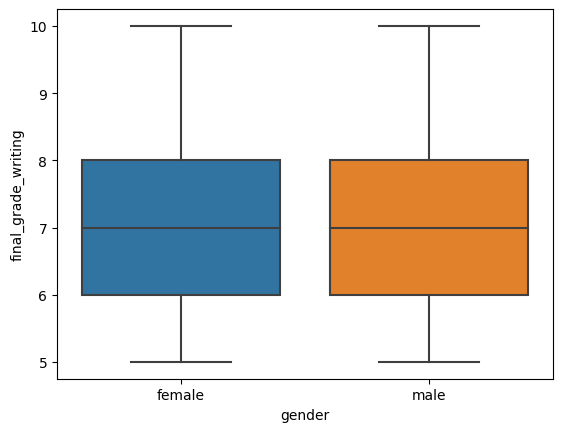

In [ ]:
sns.boxplot(x='gender', y='final_grade_writing', data=exam)
print('\n')
fig = px.histogram(exam, x='final_grade_writing', nbins=30, color='gender',title='Brojčana vrijednost ocjena iz pisanja')
fig.show()
print('\n')

Ponovo imamo nejasnu sliku o razlici u rezultatu.

# **Prikaz postotaka ostvarenog uspjeha (zastupljenosti date ocjene) studenata na osnovu pola iz matematike**

In [ ]:
pd.crosstab(exam['gender'], exam['final_grade_math'], dropna=True, normalize='columns')

final_grade_math,5,6,7,8,9,10
gender,,,,,,
female,0.644444,0.526316,0.506073,0.413146,0.386139,0.129032
male,0.355556,0.473684,0.493927,0.586854,0.613861,0.870968


# **Prikaz postotaka ostvarenog uspjeha (zastupljenosti date ocjene) studenata na osnovu pola iz čitanja**

In [ ]:
pd.crosstab(exam['gender'], exam['final_grade_reading'], dropna=True, normalize='columns')

final_grade_reading,5,6,7,8,9,10
gender,,,,,,
female,0.338346,0.405263,0.480144,0.502183,0.697674,0.761905
male,0.661654,0.594737,0.519856,0.497817,0.302326,0.238095


# **Prikaz postotaka ostvarenog uspjeha (zastupljenosti date ocjene) studenata na osnovu pola iz pisanja**

In [ ]:
pd.crosstab(exam['gender'], exam['final_grade_writing'], dropna=True, normalize='columns')

final_grade_writing,5,6,7,8,9,10
gender,,,,,,
female,0.288235,0.416268,0.463415,0.583333,0.704348,0.795455
male,0.711765,0.583732,0.536585,0.416667,0.295652,0.204545


# **Pitanje:** Ko ima više šanse da ostvari uspjeh od 85% na ispitu, studenti koji su odradili pripremni ispit ili oni koji nisu?

In [ ]:
brojnik1 = exam[(math>np.percentile(math, 85) ) & (exam['test preparation course']=='completed')].shape[0]
nazivnik1 = exam[exam['test preparation course']=='completed'].shape[0]
vjerovatnoca_zavrsenog_kursa = brojnik1 / nazivnik1
print("Vjerovatnoća da je jedan dio studenata osvojilo >=85% bodova na ispitu uz pretpostavku da su ti studenti zavrsili pripremni kurs iznosi: ",vjerovatnoca_zavrsenog_kursa)

brojnik2 = exam[(math>np.percentile(math, 85) ) & (exam['test preparation course']=='none')].shape[0]
nazivnik2 = exam[exam['test preparation course']=='none'].shape[0]
vjerovatnoca_nezavrsenog_kursa = brojnik2 / nazivnik2
print("Vjerovatnoća da je jedan dio studenata osvojilo >=85% bodova na ispitu uz pretpostavku da ti studenti nisu zavrsili pripremni kurs iznosi:",vjerovatnoca_nezavrsenog_kursa)

print('\n')


Vjerovatnoća da je jedan dio studenata osvojilo >=85% bodova na ispitu uz pretpostavku da su ti studenti zavrsili pripremni kurs iznosi:  0.17151162790697674
Vjerovatnoća da je jedan dio studenata osvojilo >=85% bodova na ispitu uz pretpostavku da ti studenti nisu zavrsili pripremni kurs iznosi: 0.11128048780487805




# Računanje kovarijansi između datih varijabli:
* Matrica kovarijanse će sadržavati kovarijanse između svih kombinacija varijabli u matrici podataka.


In [ ]:
gender_binary = np.where(exam['gender'] == 'male', 0, 1)
education_levels = ['some high school', 'high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree']
parent_education_numeric = [education_levels.index(level) for level in education]

data_matrix = np.column_stack((math, reading, gender_binary, parent_education_numeric))

covariance_matrix = np.cov(data_matrix, rowvar=False)

print(covariance_matrix)


[[ 2.32568468e+02  1.74644224e+02 -1.49501502e+00  3.47777778e+00]
 [ 1.74644224e+02  1.99019095e+02  1.52257858e+00  2.59085085e+00]
 [-1.49501502e+00  1.52257858e+00  2.50186186e-01 -1.44544545e-02]
 [ 3.47777778e+00  2.59085085e+00 -1.44544545e-02  2.21931932e+00]]
